In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
np.random.seed(123)

# Comparing two estimators.

A common method of estimating the size of biological populations is the “capture-mark-recapture” method. One proceeds by repeatedly capturing animals, putting a marker on them, and releasing them. After marking $M$ animals, you then capture a new group of $C$ animals and find that $K$ of them are tagged with your mark. We will treat each of the $C$ 2nd-round captures as independent of the other 2nd-round captures, i.e., as if you caught each animal and then re-released it immediately (“sampling with replacement”). If the full population size is $N$, then the proportion of the population that is marked is $M/N$ and thus the expected value of the proportion marked in your 2nd sample (which is $K/C$) should be the same as the population proportion. Thus, an estimate of the population size is $\hat{N} = MC/K$.

In [2]:
def estimator(K, C, M):
    return M * C / K

---

# a)

Check whether $\hat{N}$ is a maximum likelihood estimator. For a few triplets ${K,C,M}$, plot the likelihood $L(N)=p(K|C,M,N)$ for a range of values of $N$ (e.g., from $\hat{N}−5$ to $\hat{N}+5$. For example, try ${K, C, M } = {10, 200, 4000}$. Note that $N$ has to be an integer, so note whether $\hat{N}$ should be rounded or truncated to the nearest lower integer to maximize likelihood, or whether your results suggest a consistent pattern with regard to the non-integer $\hat{N}$.

The tagged proportion of the population is $M/N$, which is also the probability that a re-captured animal is marked. Let $\theta = M/N$. Then the probabiliy of $K$ tags among $C$ re-captured animals is given by Binomial distribution describing the probability of $K$ successes given $C$ binary trials with independent probability of success $\theta = M/N$:

$\text{Binomial}(K | C, \theta) = {C \choose K}(\frac{M}{N})^K(1 - \frac{M}{N})^{C-K}$.

In [3]:
from scipy.special import comb

def likelihood(K, C, M, N):
    theta = M / N
    return comb(C, K) * (theta)**K * (1 - theta)**(C - K)

First let K=10, C=200, M=4000.

In [4]:
estimator(K=10, C=200, M=4000)

80000.0

We get an estimate N=80000. What if K, C and M don't give a whole number N?

In [5]:
estimator(50, 97, 4968)

9637.92

K=50, C=97, M=4968 give N=9637.92. We can compute the likelihood of N=9637 and 9638 to determine which is more likely to explain K.

In [6]:
likelihood(50, 97, 4968, 9637) < likelihood(50, 97, 4968, 9638)

True

N = 9638 was the better estimate, presumably since it's closer to the true estimate 9637.92.

Now let's try an N with a fractional value less than 0.5 and see if we need to round down. Let K=50, C=103, M=158.

In [7]:
estimator(50, 103, 158)

325.48

Now the estimate N=325.48. Which whole number N, 325 or 326, is more likely?

In [8]:
likelihood(50, 103, 158, 325) > likelihood(50, 103, 158, 326)

True

325 is more likely since 325.48 is closer to 325 than 326.

These results suggest a decision rule: when the MLE $\hat{N}$ is a fraction round it up or down to the nearest integer to get the population size estimate.

In [9]:
def plot_mle(K, C, M):
    N = np.round(estimator(K=K, C=C, M=M))
    x = np.arange(N - 5, N + 6)
    y = [likelihood(K, C, M, n) for n in x]
    plt.plot(x, y)
    plt.title(f'K={K}, C={C}, M={M}')
    plt.xlabel('Population size N')
    plt.ylabel('Probability of N given K')

Likelihood functions for four different sets of K, C, M are shown below.

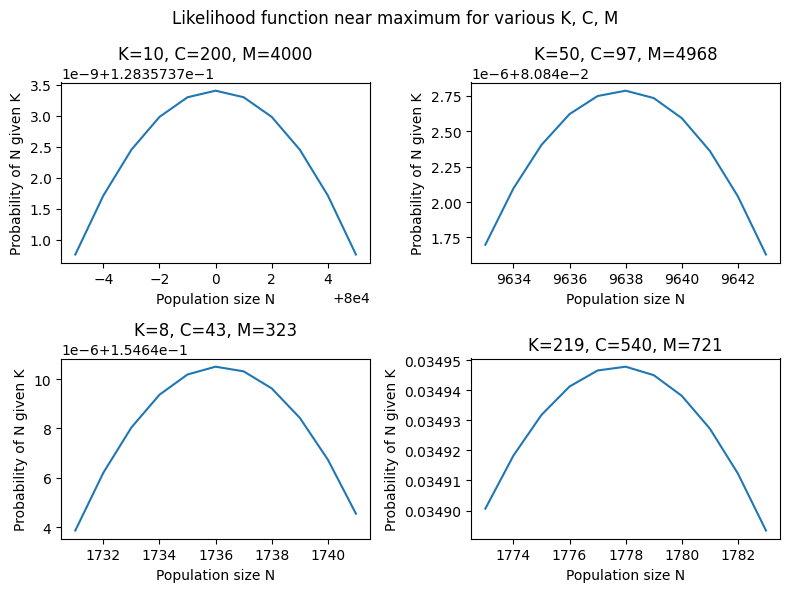

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
plt.sca(axs.flat[0])
plot_mle(K=10, C=200, M=4000)
plt.sca(axs.flat[1])
plot_mle(K=50, C=97, M=4968)
plt.sca(axs.flat[2])
plot_mle(K=8, C=43, M=323)
plt.sca(axs.flat[3])
plot_mle(K=219, C=540, M=721)
plt.suptitle('Likelihood function near maximum for various K, C, M')
plt.tight_layout()
plt.show()

---

# b)

Check whether the estimator is unbiased. For a few triplets ${C, M, N }$, simulate the 2nd capture value K 1,000 times (i.e., generate appropriately distributed samples of $K$), and compute the population estimate from each. Is the mean of the population estimates close to the correct answer?

In [11]:
def simulate(C, M, N):
    population = np.zeros(N)
    population[:M] = 1
    caught = np.random.choice(population, C, replace=True)
    K = np.sum(caught)
    return K

In [12]:
def mean_population_estimate(C, M, N):
    Ks = []
    for i in range(1000):
        K = simulate(C, M, N)
        Ks.append(K)
    Ns = [estimator(K, C, M) for K in Ks]
    return np.mean(Ns)

In [13]:
mean_population_estimate(C=200, M=4000, N=80000)

90398.72719643617

For C=200, M=4000, N=80000, 1000 simulations usually give a mean population estimate around 90000. This more than 10% off from the true population size of 80000, indicating a bias to overestimate.

In [14]:
mean_population_estimate(C=97, M=4968, N=9638)

9798.719854357263

C=97, M=4968, N=9638 usually gives mean population estimates above 9700, exceeding 9638. The estimator is biased to overestimate N.

In [15]:
mean_population_estimate(C=43, M=323, N=1736)

1997.4581978132978

For C=43, M=323, N=1736 the estimator overestimates N as well.

---

# c)

Write the precise distribution for samples $K$ (when ${C,M,N}$ are known and fixed), so you can compute the exact probability distribution of estimates $\hat{N}$. Do that for $N = 1000$, $M = 100$, $C = 100$. Plot the distribution and compute its mean and standard deviation. Does this calculation indicate that the estimator is biased? (Note: do this for the non-integer value of $\hat{N}$).

$K$ is a random variable drawn from the distribution $\text{Binomial}(K | C, \theta)$ where $\theta = M/N$:

$P(K=k| C, M, N)  = {C \choose k}(\frac{M}{N})^k(1 - \frac{M}{N})^{C-k}$.

Now, random variable $\hat{N}$ is defined as $\hat{N} = M C / K$. To find the probability distribution of $\hat{N}$, we need to find $P(\hat{N} = n$), which is the probability that $\frac{M C}{k} = n$. This occurs when $k = \frac{M C}{n}$.

So $P(\hat{N} = n) = P(K = \frac{M C}{n}) = {C \choose \frac{M C}{n}}(\frac{M}{N})^{\frac{M C}{n}}(1 - \frac{M}{N})^{C-\frac{M C}{n}}$.

In [16]:
def mle_probability(n, N, M, C):
    theta = M / N
    k = M * C / n
    return comb(C, k) * (theta)**k * (1 - theta)**(C - k)

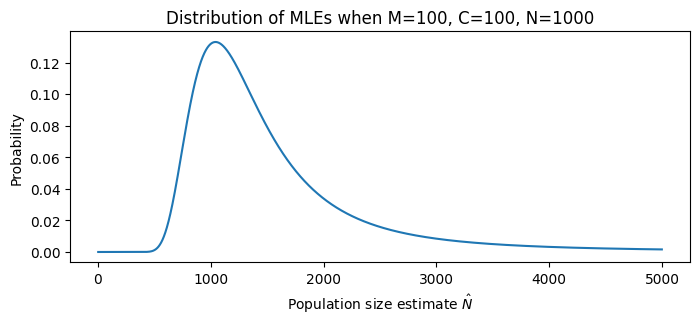

In [17]:
x = np.arange(2, 5000)
y = [mle_probability(n=n, C=100, M=100, N=1000) for n in x]
plt.subplots(figsize=(8, 3))
plt.plot(x, y)
plt.title('Distribution of MLEs when M=100, C=100, N=1000')
plt.xlabel('Population size estimate $\hat{N}$')
plt.ylabel('Probability')
plt.show()

In [18]:
x = np.arange(2, 10000)
p_n = [mle_probability(n=n, C=100, M=100, N=1000) for n in x]
p_n /= np.sum(p_n)
mean_N = np.sum(p_n * x)
std_N = np.sum(p_n * np.abs(x - mean_N))
mean_N, std_N

(1633.4328341324479, 683.1636297688008)

This calculation shows that the estimator is biased: though the true population is 1000, it estimates 1633 on average. The estimator also has large variance: its estimates have a standard deviation of 683. The variance of this estimator is about the same as its squared bias.

---

# d)

Some authors have suggested an alternative estimator: $\hat{N}' = ⌊(M + 1)(C + 1)/(K + 1)⌋$, where $⌊·⌋$ indicates truncation to the next lower integer. Repeat part (c) for this estimator and compare the bias and variance of this estimator to the original one.

We can rewrite $n = ⌊(M + 1)(C + 1)/(k + 1)⌋$ as the inequality

$n \leq \frac{(M+1)(C+1)}{k+1} < n + 1$.

Multiplying both sides by $k + 1$ gives

$(k + 1)n \leq (M+1)(C+1) < (k+1)(n+1)$.

We can rewrite this as two inequalities

$k + 1 \leq \frac{(M+1)(C+1)}{n}$ and $\frac{(M+1)(C+1)}{n+1} < k+1$,

and then write the single equality

$\frac{(M+1)(C+1)}{n+1}-1 < k \leq \frac{(M+1)(C+1)}{n}-1$.

Given $n = ⌊(M + 1)(C + 1)/(k + 1)⌋$, we want the $k$ which makes the quantity inside the floor function as low as possible. This happens at the maximum for $k$ in the inequality above:

$k = \frac{(M+1)(C+1)}{n}-1$.

In [19]:
def alt_probability(n, N, M, C):
    theta = M / N
    k = (M + 1) * (C + 1) / n - 1
    return comb(C, k) * (theta)**k * (1 - theta)**(C - k)

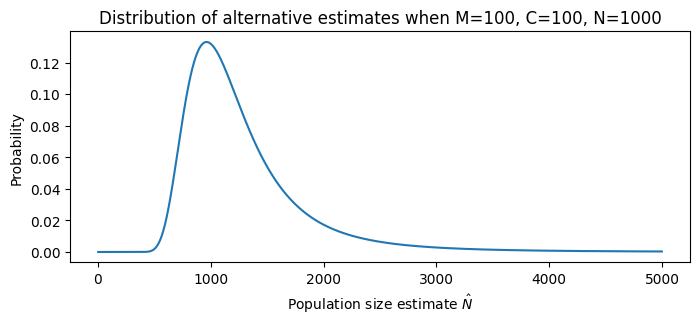

In [20]:
x = np.arange(2, 5000)
y = [alt_probability(n=n, C=100, M=100, N=1000) for n in x]
plt.subplots(figsize=(8, 3))
plt.plot(x, y)
plt.title('Distribution of alternative estimates when M=100, C=100, N=1000')
plt.xlabel('Population size estimate $\hat{N}$')
plt.ylabel('Probability')
plt.show()

In [21]:
x = np.arange(2, 10000)
p_n = [alt_probability(n=n, C=100, M=100, N=1000) for n in x]
p_n /= np.sum(p_n)
mean_N = np.sum(p_n * x)
std_N = np.sum(p_n * np.abs(x - mean_N))
mean_N, std_N

(1301.6259717957555, 415.6120984094553)

This estimator has lower bias and variance than the maximum likelihood estimator (bias: 1633, std: 683). It does not overestimate as badly and we can expect it to converge more quickly.